In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import jupyterlab
from scipy.stats import multivariate_normal

In [37]:
whole_space_x = np.random.uniform(low=0., high=140., size=10000)
whole_space_y = np.random.uniform(low=0., high=140., size=10000)

whole_space = np.vstack((whole_space_x,whole_space_y))
whole_space = np.transpose(whole_space)

In [28]:
group_0 = np.random.exponential(scale=10, size=(100,2)) + np.ones((100,2))*8
group_1 = np.random.exponential(scale=20, size=(100,2)) + np.ones((100,2))*20
group_2 = np.random.exponential(scale=8, size=(100,2)) + np.hstack((np.zeros((100,1)),np.ones((100,1))*30))
group_3 = np.random.exponential(scale=9, size=(100,2)) + np.hstack((np.ones((100,1))*80,np.ones((100,1))*60))

In [29]:
list_of_cols = ['b','r','g','m']
list_labeled = [group_0,group_1,group_2,group_3]

/tmp/ipykernel_846/3322404343.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(exp_distrib[:,0], exp_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_846/3322404343.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(exp_distrib[:,0], exp_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


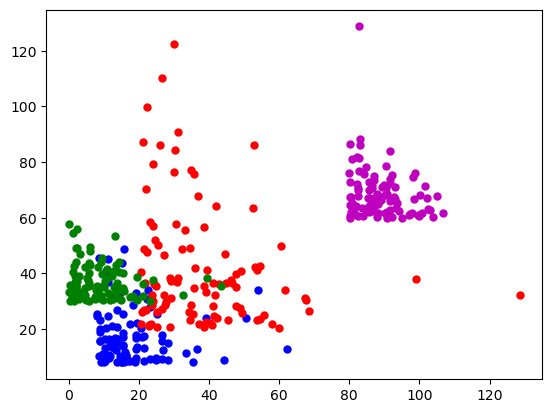

In [30]:
for i in range(4):
    exp_distrib = list_labeled[i]
    plt.plot(exp_distrib[:,0], exp_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

In [32]:
data = np.vstack((group_1,group_2,group_3,group_4))

In [34]:
parameters_estimated = {}
for i in range(4):
    parameters_estimated['mean_{0}'.format(i)] = np.mean(list_labeled[i][:,:], axis=0)
    parameters_estimated['cov_{0}'.format(i)] = np.cov(list_labeled[i][:,:], rowvar=False)

In [35]:
def classifier_values(m, pi_m, mu_hat_m, sigma_hat_m,x_test):
    """compute the conditional density of y for a certain m given x

    Parameters:
    --------------------------
    m: int
    the class of y
    
    pi_m: float
    the probability of y belonging to the class

    mu_hat_m : array-like object
    the mean of the x's that have a y in the class m

    sigma_hat_m: 2-D array-like object
    the estimated covariance matrix for a certain class

    x_test: array-like object
    test input
    -------------------------
    """
    y = np.log(pi_m) + multivariate_normal.logpdf(x=x_test, mean=mu_hat_m, cov=sigma_hat_m)
    return y

In [38]:
y_values = {}
for category in range(4):
    list_of_output = []
    for i in range(10000):
        y = classifier_values(m=i, pi_m=1/4,
                              mu_hat_m=parameters_estimated[f'mean_{category}'],
                              sigma_hat_m=parameters_estimated[f'cov_{category}'],x_test=whole_space[i,:])
        list_of_output.append(y)
        
    y_values['class_{0}'.format(category)] = list_of_output

In [39]:
total_output = np.zeros((10000,4))

In [40]:
for category in range(4):
    for i in range(10000):
        total_output[i,category] = y_values[f'class_{category}'][i]

In [41]:
retained_dict = {'0':[], '1':[], '2':[], '3':[]}
for i in range(10000):
    values = total_output[i,:]
    llmax = np.max(values)
    retained_dict[str(np.where(values == llmax)[0][0])].append(whole_space[i,:])

In [42]:
to_plot_0 = np.empty((len(retained_dict['0']),2))
to_plot_1 = np.empty((len(retained_dict['1']),2))
to_plot_2 = np.empty((len(retained_dict['2']),2))
to_plot_3 = np.empty((len(retained_dict['3']),2))
for i in range(len(retained_dict['0'])):
    to_plot_0[i] = retained_dict[str(0)][i]
for i in range(len(retained_dict['1'])):
    to_plot_1[i] = retained_dict[str(1)][i]
for i in range(len(retained_dict['2'])):
    to_plot_2[i] = retained_dict[str(2)][i]
for i in range(len(retained_dict['3'])):
    to_plot_3[i] = retained_dict[str(3)][i]

/tmp/ipykernel_846/3015894690.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_846/3015894690.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


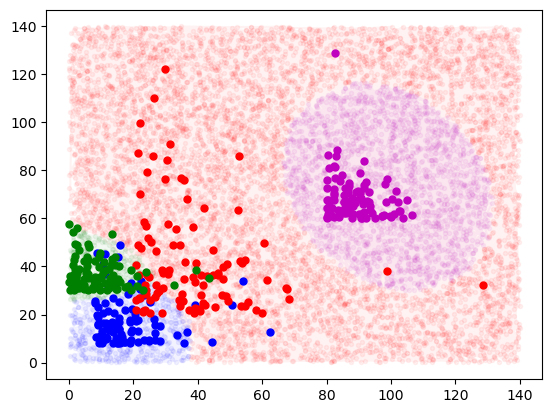

In [43]:
plt.plot(to_plot_0[:,0], to_plot_0[:,1], alpha=0.05, marker='.', color='b')
plt.plot(to_plot_1[:,0], to_plot_1[:,1], alpha=0.05, marker='.', color='r')
plt.plot(to_plot_2[:,0], to_plot_2[:,1], alpha=0.05, marker='.', color='g')
plt.plot(to_plot_3[:,0], to_plot_3[:,1], alpha=0.05, marker='.', color='m')
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

#### We can see that it works pretty well as the red label is the one with the most 'volatile' distribution as it has the highest expectation.
However, in the part where the blue, red, and green are close to each other, there is missclassification but is it quite normal as the data is not 'separable'. 
A more 'problematic' point would be that the shapes don't really match with the type of distribution but that is quite obvious from the method we used.